<a href="https://colab.research.google.com/github/DVN111/Data-Analyst-Portfolio/blob/main/Aplikasi%20penentuan%20title%20produk%20dengan%20pendekatan%20machine%20learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Simulasi analsisis kompetitor terkait title produk di ecommerce


## Problem statement
Saat ini perusahaan facify sedang ingin menjual produk gentle facewash di ecommerce, karnanya, divisi marketing perlu menentukan judul apa yang paling optimal untuk produk yang akan dijual sehingga ketika user mecari facewash, produk ini akan terindeks paling atss.

# Data Collecting
Untuk itu, data yang kita perlukan ialah data title produk yang terlaris dan rating tertinggi, harga, brand, harga aktual, rating dan jumlah produk terjual.

## Data Exploration

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('/content/output_data (1).csv')

Analsis:
- Untuk menganalsiis data pada harga, harga aktual dan sold, kita harus memastikannya sebagai tipe data number. karnanya kita perlu membersihkannya.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Nama Produk   60 non-null     object 
 1   Brand         60 non-null     object 
 2   Harga         60 non-null     object 
 3   Harga Aktual  34 non-null     object 
 4   Rating        60 non-null     float64
 5   Sold          60 non-null     object 
dtypes: float64(1), object(5)
memory usage: 2.9+ KB


analsiis:
- Terdapat kesalahan tipe data pada kolom harga, harga aktual, dan sold. Seharusnya kolom kolom itu menggunakan tipe data number seperti float.
= terdapat juga nilai nan pada kolom harga aktual, nilai nan ini disebabkan karna ada beberapa produk yang memang tidak sedang dalam promosi diskon.

## Data Cleaning

Dari beberapa analisis sebelumnya, kita harus membersihkan kolom harga, harga aktual,sold dan mengisi nilai null yang ada dalam kolom data aktual. Untuk analsiis lebih lanjut, mungkin kita memerlukan data diskonnya, maka kita perlu membuat kolom baru yang berisi diskon


In [6]:
# Mngehapus karakter yang tddak diperlukan dan mengganti rb dengan nol untuk nilai ribuan.
df['Sold'] = df['Sold'].str.replace('+ terjual', '')
df['Sold'] = df['Sold'].str.replace('rb', '000').astype(int)

# mengisis nilai null pada tiap baris dalam kolom harga aktual dengan data yang ada dalam kolom harga
df['Harga Aktual'].fillna(df['Harga'], inplace=True)

# membersihkan kolom harga dan harga aktual
df['Harga'] = df['Harga'].str.replace('Rp', '').str.replace('.', '').astype(float)
df['Harga Aktual'] = df['Harga Aktual'].str.replace('Rp', '').str.replace('.', '').astype(float)

# Membuat kolom baru untuk diskon
df['Diskon'] = ((df['Harga Aktual'] - df['Harga']) / df['Harga Aktual']) * 100

# Mengisi nilai NaN di kolom 'Diskon' dengan 0 jika ada.
df['Diskon'].fillna(0, inplace=True)


In [7]:
df.head(50)

,Nama Produk,Brand,Harga,Harga Aktual,Rating,Sold,Diskon
0,Gentle Facial Wash Avoskin Natural Sublime Fac...,Avoskin,104000.0,139000.0,5.0,10000,25.179856
1,Kahf Oil and Acne Care Face Wash 100 ml Triple...,Kahf Official,108375.0,127500.0,4.9,10000,15.000000
2,Kahf Skin Energizing & Brightening Face Wash 1...,Kahf Official,108375.0,127500.0,4.9,10000,15.000000
3,Garnier Bright Complete 3-in-1 Anti Acne Facia...,Garnier Official Store,102696.0,116700.0,5.0,8000,12.000000
4,PROMO FEED SKIN Facial Wash Brotowali [For Men],Feed Skin Natural Official Store,95850.0,135000.0,4.9,3000,29.000000
5,Sabun Muka Bumil & Busui BPOM Halal | Mama's C...,MamasChoiceID,90342.0,119000.0,4.9,3000,24.082353
6,ILLUMINARE ACNE FACIAL WASH 100G / SABUN WAJAH...,CENTURY HEALTHCARE,105000.0,105000.0,4.9,4000,0.000000
7,Somethinc Low PH Gentle Jelly Cleanser Facial ...,Orabelle Beauty,99000.0,99000.0,5.0,2000,0.000000
8,MS Glow Men Energizer Facial Wash Sabun Cuci M...,MS Glow Official Store,93700.0,120000.0,5.0,1000,21.916667
9,Sebamed Cleansing Bar Dewasa 100gr / Sabun Muk...,toku pedia,106500.0,106500.0,5.0,3000,0.000000


karna kita inginmenganalisis suatu produk secara objektif, kita harus menyingkrkan produk yang merupakan bundle seperti 3 produk jadi 1. makanya kita perlu menganalisis apakah ada bundle atau tidak dalam data kita.

In [8]:
# prompt: analsiis apakah dlam data terdapat produk yang merupakan bundel berisi lebih dari 1 pcs

# Mengecek apakah ada produk yang merupakan bundel berisi lebih dari 1 pcs
bundle_products = df[df['Nama Produk'].str.contains('pcs|pack|set|paket', case=False)]
print(f"Jumlah produk bundle: {len(bundle_products)}")
if len(bundle_products) > 0:
  print("Terdapat produk bundle dalam data.")
  print(bundle_products[['Nama Produk', 'Sold']])
else:
  print("Tidak terdapat produk bundle dalam data.")


Jumlah produk bundle: 13
Terdapat produk bundle dalam data.
                                          Nama Produk   Sold
1   Kahf Oil and Acne Care Face Wash 100 ml Triple...  10000
2   Kahf Skin Energizing & Brightening Face Wash 1...  10000
3   Garnier Bright Complete 3-in-1 Anti Acne Facia...   8000
8   MS Glow Men Energizer Facial Wash Sabun Cuci M...   1000
13     Natasha by dr Fredi Setyawan Men's Facial Wash   1000
16  NIVEA MEN Bright Dark Spot Minimizer Facial Fo...   1000
17  Natasha By dr Fredi Setyawan Amino Facial Wash...   1000
19       MS Glow Men Energizer Facial Wash 2 pcs - FS    750
22  Natasha by dr Fredi Setyawan Gentle Foam Facia...    750
33  Pond's Men Pollution Out Face Wash 100g Twin Pack    250
42  Paket PROMO 2 Facial Wash MS GLOW MEN - Sabun ...    250
54  Garnier Bright Complete Whip Facial Foam 100ml...    250
55  Natasha by dr Fredi Setyawan Teen's Facial Was...    250


Analisis:
- Setidaknya ada 12 produk yang merupakan bundle, maka kita akan mengecualikannya.

In [9]:
# filter produk yang merupakan diskon dan jangan dimasukkan kedalam dataset.
df = df[~df['Nama Produk'].str.contains('bundle|pack|pcs', case=False, na=False)]
df.head(2)

,Nama Produk,Brand,Harga,Harga Aktual,Rating,Sold,Diskon
0,Gentle Facial Wash Avoskin Natural Sublime Fac...,Avoskin,104000.0,139000.0,5.0,10000,25.179856
4,PROMO FEED SKIN Facial Wash Brotowali [For Men],Feed Skin Natural Official Store,95850.0,135000.0,4.9,3000,29.000000


## **Analisis Untuk Penentuan judul**
dalam penentuannya, kita akan memisahkan semua kata dalam nama produk kemudian kita akan cari kata apa saja yang paling banyak disebut dalam nama produk yang terlarisd dan rating tertinggi.

In [10]:
# prompt: analisis kata apa yang paling seingmuncul dalam nama produk dengan jumlah sold dan rating tertinggi. kemudian gunakan machine learning untuk memprediksi nama produk agar soldnya tinggi

# Menggabungkan semua kata dalam kolom 'Nama Produk' menjadi satu string besar
all_words = ' '.join(df['Nama Produk'].astype(str).values)

# Memisahkan kata-kata dalam string
words = all_words.lower().split()

# Menghitung frekuensi setiap kata
from collections import Counter
word_counts = Counter(words)

# Menampilkan kata-kata yang paling sering muncul
most_common_words = word_counts.most_common(20)
print("Kata-kata yang paling sering muncul:")
print(most_common_words)

# Memfilter data berdasarkan jumlah sold dan rating
top_products = df.sort_values(by=['Sold', 'Rating'], ascending=False).head(100)

# Menggabungkan semua kata dalam kolom 'Nama Produk' dari produk teratas menjadi satu string besar
top_words = ' '.join(top_products['Nama Produk'].astype(str).values)

# Memisahkan kata-kata dalam string
top_words_list = top_words.lower().split()

# Menghitung frekuensi setiap kata
top_word_counts = Counter(top_words_list)

# Menampilkan kata-kata yang paling sering muncul dalam produk teratas
top_most_common_words = top_word_counts.most_common(20)
print("\nKata-kata yang paling sering muncul dalam produk teratas:")
print(top_most_common_words)




Kata-kata yang paling sering muncul:
[('facial', 40), ('wash', 40), ('sabun', 17), ('-', 14), ('face', 12), ('skin', 9), ('/', 9), ('gentle', 8), ('cleanser', 8), ('muka', 8), ('|', 7), ('100ml', 6), ('acne', 6), ('wajah', 6), ('cuci', 6), ('&', 5), ('feed', 4), ('illuminare', 4), ('100g', 4), ('ml', 4)]

Kata-kata yang paling sering muncul dalam produk teratas:
[('facial', 40), ('wash', 40), ('sabun', 17), ('-', 14), ('face', 12), ('/', 9), ('skin', 9), ('gentle', 8), ('cleanser', 8), ('muka', 8), ('|', 7), ('100ml', 6), ('acne', 6), ('wajah', 6), ('cuci', 6), ('&', 5), ('illuminare', 4), ('100g', 4), ('100', 4), ('feed', 4)]


Analisis:
- beberapa kata yang paling sering muncul ialah facial, wash, sabun, face, skin  gentle dll.
- terdapat beberpa nama produk yang menggunakan - dalam nama produknya, analisis lebih lanjut menunjukkan bahwa simbol "-" , "|" atau sejenisnya  biasanya digunakan kompetitor untuk memberi kejelasan lebih lanjut terkait produknya, manfaat, ukuran dll dan mengoptimalkan kata kunci menggunakan bahasa indonesia. seperti "*Kusuma Beauty Facial Wash 100ml - Sabun Cuci Muka Reviving*"

# Mencoba apakah

In [11]:
# Memisahkan kata-kata dalam nama produk menjadi fitur
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['Nama Produk'])

# Menentukan target variabel (misalnya, 'Sold')
y = df['Sold']

# Membagi data menjadi data latih dan data uji
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Melatih model machine learning (misalnya, regresi linear)
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

# Memprediksi jumlah sold pada data uji
y_pred = model.predict(X_test)

# Evaluasi model
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"\nMean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Contoh memprediksi jumlah sold untuk nama produk baru
new_product_name = ["Gentle Face Wash for Sensitive Skin"]
new_product_features = vectorizer.transform(new_product_name)
predicted_sold = model.predict(new_product_features)
print(f"\nPrediksi jumlah sold untuk '{new_product_name[0]}': {predicted_sold[0]}")


Mean Squared Error: 2693965.585998726
R-squared: -0.7565395980376981

Prediksi jumlah sold untuk 'Gentle Face Wash for Sensitive Skin': 3045.1202240882467


# Kesimpulan
Dari hasil sebelumya, kita telah menemukan banyak insight terkait kata apa yang dapat mengoptimalkan promosi produk. Setidaknya, berikut adalah rekomendasi judul produk yang dapat dipakai:
- Facify Gentle Facial Wash - Sabun Cuci Muka [kelebihan, misalanya "mengandung niacinamide"] [untuk apa] - [ukuran dalam ml]

# Analisis lebih lanjut

                            OLS Regression Results                            
Dep. Variable:                   Sold   R-squared:                       0.079
Model:                            OLS   Adj. R-squared:                  0.022
Method:                 Least Squares   F-statistic:                     1.381
Date:                Sat, 14 Sep 2024   Prob (F-statistic):              0.260
Time:                        17:02:12   Log-Likelihood:                -453.75
No. Observations:                  52   AIC:                             915.5
Df Residuals:                      48   BIC:                             923.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -8368.5656   2.01e+04     -0.417      0.6

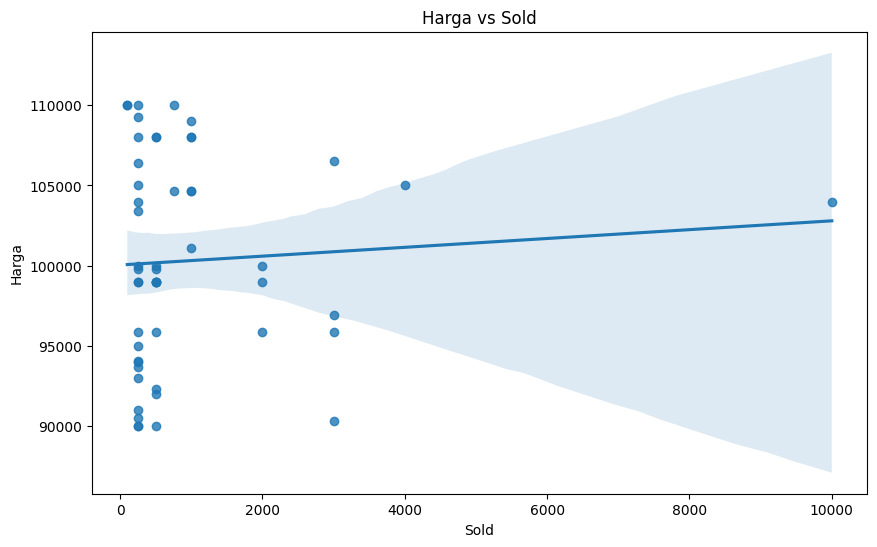

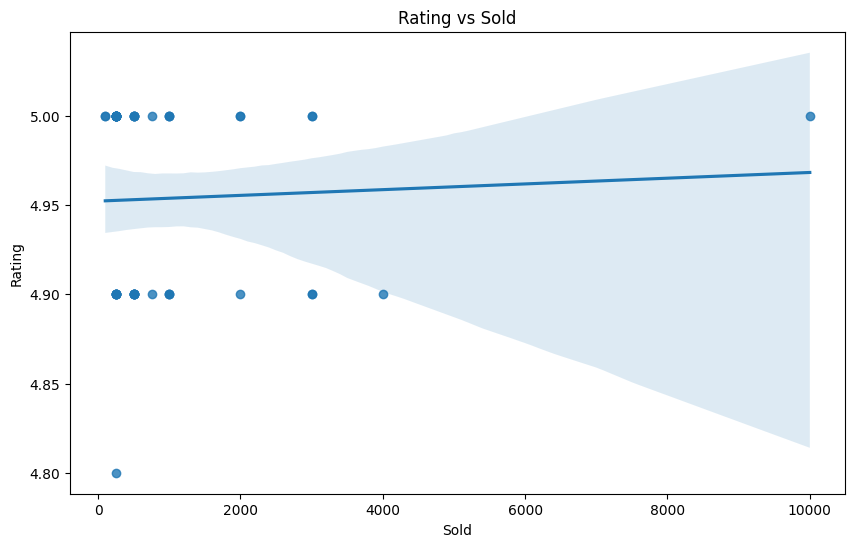

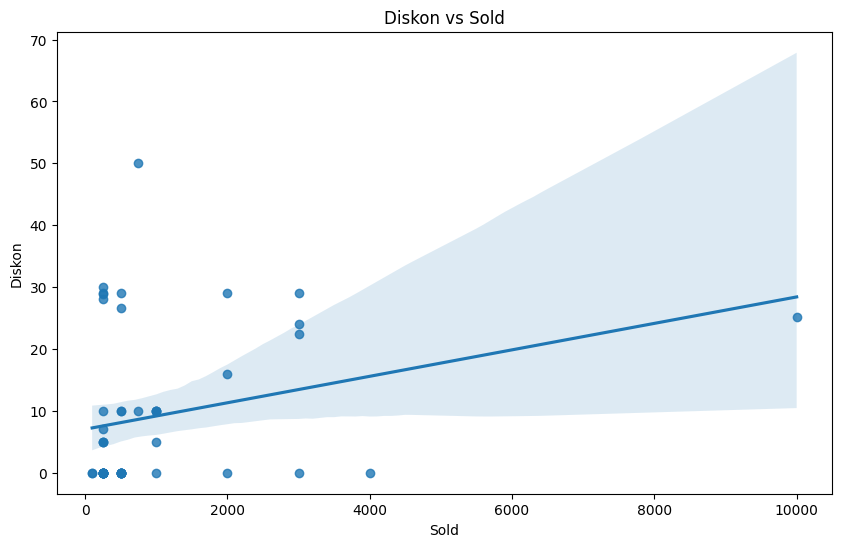

In [14]:
# prompt: analsis pengaruh harga, rating, dan diskon terhadap jumlah terjual dan gunakan plot regresi linier. taruh terjuanl pada sumbu x

import statsmodels.formula.api as smf

# Create a regression model
model = smf.ols('Sold ~ Harga + Rating + Diskon', data=df)
results = model.fit()

# Print the summary of the model
print(results.summary())

# Plot regression lines
plt.figure(figsize=(10, 6))

# Harga vs Sold
sns.regplot(x='Sold', y='Harga', data=df)
plt.xlabel('Sold')
plt.ylabel('Harga')
plt.title('Harga vs Sold')
plt.show()

# Rating vs Sold
plt.figure(figsize=(10, 6))
sns.regplot(x='Sold', y='Rating', data=df)
plt.xlabel('Sold')
plt.ylabel('Rating')
plt.title('Rating vs Sold')
plt.show()

# Diskon vs Sold
plt.figure(figsize=(10, 6))
sns.regplot(x='Sold', y='Diskon', data=df)
plt.xlabel('Sold')
plt.ylabel('Diskon')
plt.title('Diskon vs Sold')
plt.show()
